#📌 Extracción

In [2]:
import pandas as pd
import requests

# URL del archivo JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [3]:
# Obtener los datos
response = requests.get(url)
data = response.json()

In [4]:
# Convertir a DataFrame
df = pd.DataFrame(data)

In [5]:
# Vista previa
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
# Expandir columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar todas con columnas simples
df_flat = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Convertir 'Churn' a categoría
df_flat['Churn'] = df_flat['Churn'].astype('category')

# Vista previa
df_flat.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
# Ver nombres y tipos de datos
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   object  
 3   SeniorCitizen     7267 non-null   int64   
 4   Partner           7267 non-null   object  
 5   Dependents        7267 non-null   object  
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   object  
 8   MultipleLines     7267 non-null   object  
 9   InternetService   7267 non-null   object  
 10  OnlineSecurity    7267 non-null   object  
 11  OnlineBackup      7267 non-null   object  
 12  DeviceProtection  7267 non-null   object  
 13  TechSupport       7267 non-null   object  
 14  StreamingTV       7267 non-null   object  
 15  StreamingMovies   7267 non-null   object  
 16  Contract          7267 n

In [8]:
# Estadísticas generales para variables numéricas
df_flat.describe()

# Conteo de valores únicos por columna categórica
df_flat.select_dtypes('object').nunique()

,0
customerID,7267
gender,2
Partner,2
Dependents,2
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
DeviceProtection,3


In [9]:
# Copia del dataframe original limpio
df_clean = df_flat.copy()

# 1. 🔁 Duplicados
duplicados = df_clean.duplicated().sum()
print(f"❗ Registros duplicados: {duplicados}")
if duplicados > 0:
    df_clean = df_clean.drop_duplicates()

# 2. ❌ Valores nulos
print("\n🔍 Valores nulos por columna:")
print(df_clean.isnull().sum())

# 3. 🔠 Revisión de categorías únicas en columnas categóricas
print("\n📦 Categorías por variable categórica:")
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df_clean[col].unique()}")

# 4. 💥 Revisión de valores inconsistentes o errores de formato
# Por ejemplo: whitespace, 'yes' vs 'Yes', etc.
for col in cat_cols:
    df_clean[col] = df_clean[col].str.strip().str.capitalize()

❗ Registros duplicados: 0

🔍 Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

📦 Categorías por variable categórica:
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet

In [34]:
# 🔁 Partimos del dataframe limpio
df_clean = df_flat.copy()
# Vista previa
df_clean.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [35]:
# Mapear valores 'yes' y 'no' a 1 y 0
bin_cols = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'PaperlessBilling']

for col in bin_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})

In [36]:
df_clean.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'adulto_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_como_cliente',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'peliculas_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'facturacion_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total'
}, inplace=True)


In [37]:
# Adulto mayor como binario
df_clean['adulto_mayor'] = df_clean['adulto_mayor'].astype(int)

# Revisar estructura final
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7267 non-null   object 
 1   abandono                 7043 non-null   float64
 2   genero                   7267 non-null   object 
 3   adulto_mayor             7267 non-null   int64  
 4   tiene_pareja             7267 non-null   int64  
 5   tiene_dependientes       7267 non-null   int64  
 6   meses_como_cliente       7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   int64  
 8   lineas_multiples         6560 non-null   float64
 9   tipo_internet            7267 non-null   object 
 10  seguridad_en_linea       5686 non-null   float64
 11  respaldo_en_linea        5686 non-null   float64
 12  proteccion_dispositivo   5686 non-null   float64
 13  soporte_tecnico          5686 non-null   float64
 14  tv_streaming            

#📊 Carga y análisis

In [38]:
# Estadísticas generales para variables numéricas
df_clean.describe()

,abandono,adulto_mayor,tiene_pareja,tiene_dependientes,meses_como_cliente,servicio_telefonico,lineas_multiples,seguridad_en_linea,respaldo_en_linea,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,facturacion_electronica,cargo_mensual
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,6560.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,5686.000000,7267.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,0.902711,0.467226,0.365459,0.440380,0.438094,0.370032,0.490679,0.495251,0.593230,64.720098
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.498963,0.481601,0.496476,0.496196,0.482855,0.499957,0.500021,0.491265,30.129572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000


In [39]:
# Agrupamos por 'abandono' y describimos
# Verifica nombres reales primero
print(df_clean.columns)

# Calcular costo total si no existe
if 'costo_total' not in df_clean.columns:
    df_clean['costo_total'] = df_clean['cargo_mensual'] * df_clean['meses_como_cliente']


Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'meses_como_cliente', 'servicio_telefonico',
       'lineas_multiples', 'tipo_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'facturacion_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')


In [40]:
df_clean.head()

,id_cliente,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_como_cliente,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total,costo_total
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,590.4
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,539.1
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,295.6
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,1274.0
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,251.7


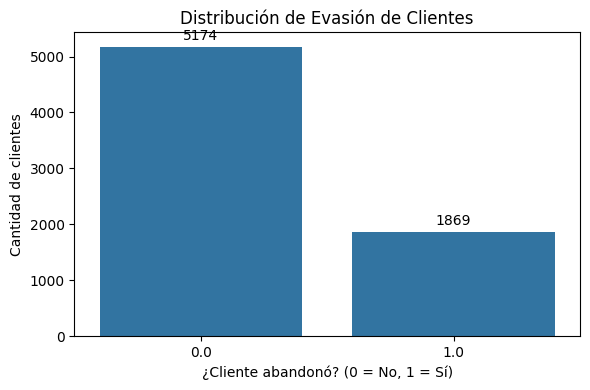

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico y guardarlo como 'ax'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_clean, x='abandono')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('¿Cliente abandonó? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')

# Agregar etiquetas numéricas encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


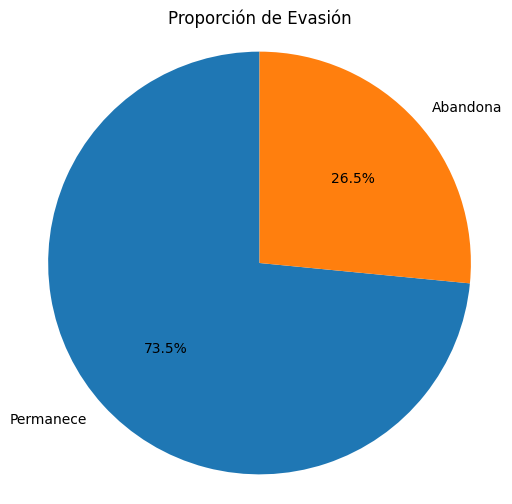

In [49]:
# Distribución de churn
labels = ['Permanece', 'Abandona']
counts = df_clean['abandono'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Evasión')
plt.axis('equal')
plt.show()


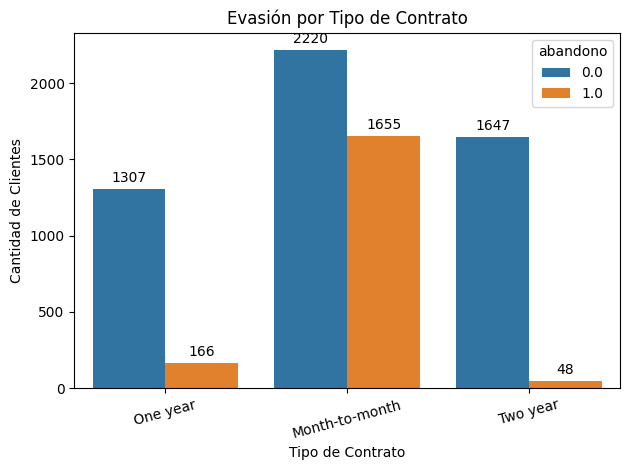

In [51]:
ax = sns.countplot(data=df_clean, x='tipo_contrato', hue='abandono')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=15)

# Agregar etiquetas encima de las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

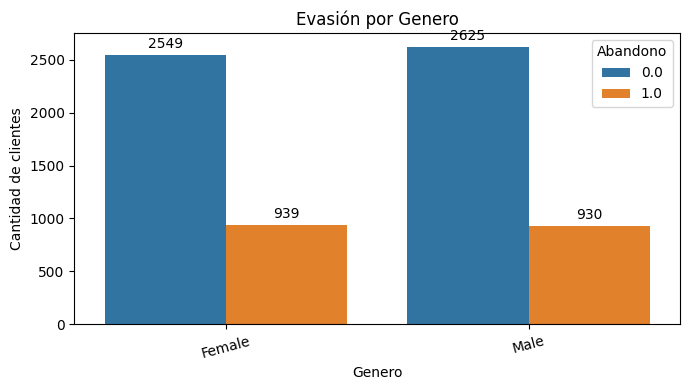

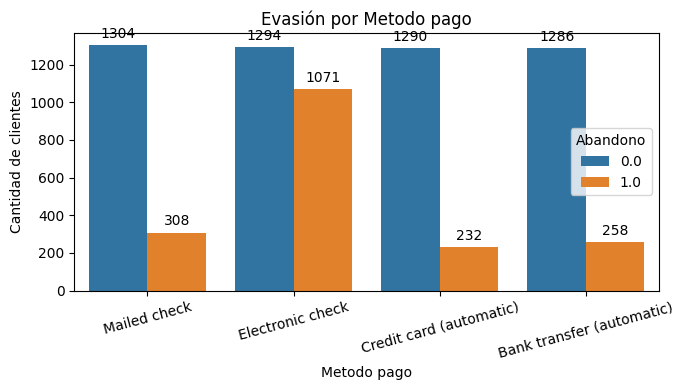

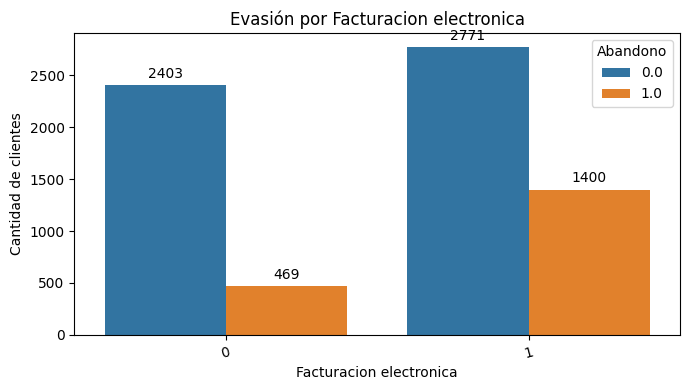

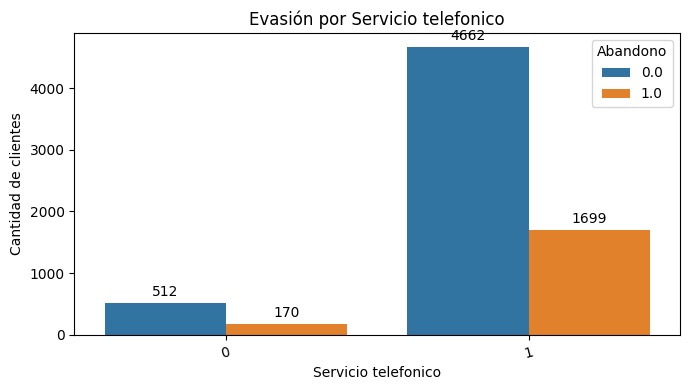

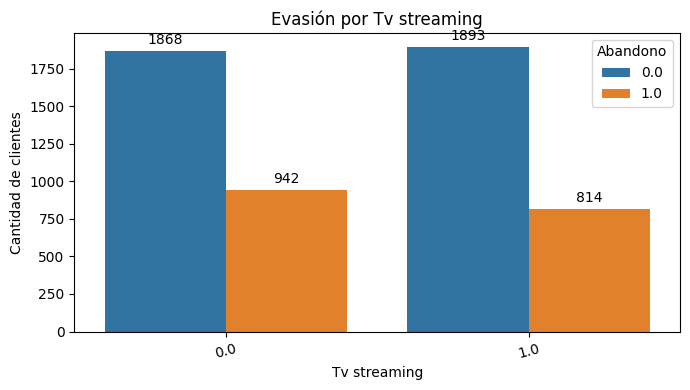

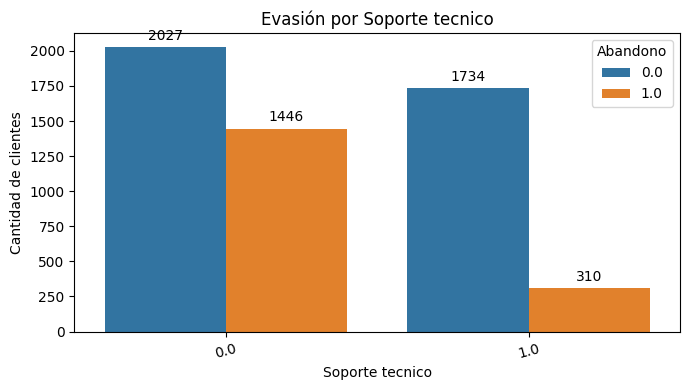

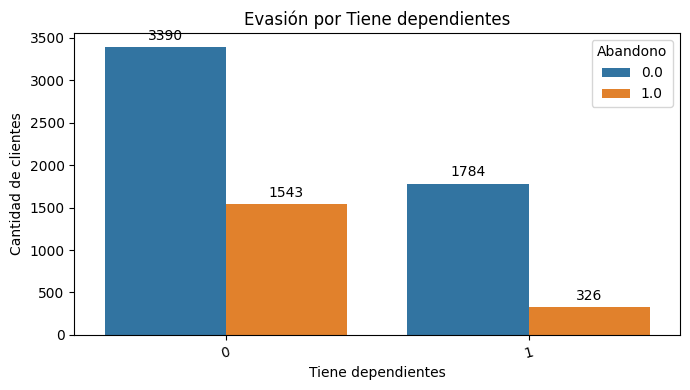

In [55]:
categorical_vars = [
    'genero',
    'metodo_pago',
    'facturacion_electronica',
    'servicio_telefonico',
    'tv_streaming',
    'soporte_tecnico',
    'tiene_dependientes'
]

import seaborn as sns
import matplotlib.pyplot as plt

for var in categorical_vars:
    plt.figure(figsize=(7,4))
    ax = sns.countplot(data=df_clean, x=var, hue='abandono')
    plt.title(f'Evasión por {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Abandono')
    plt.xticks(rotation=15)

    # 👉 Etiquetas en cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    plt.tight_layout()
    plt.show()



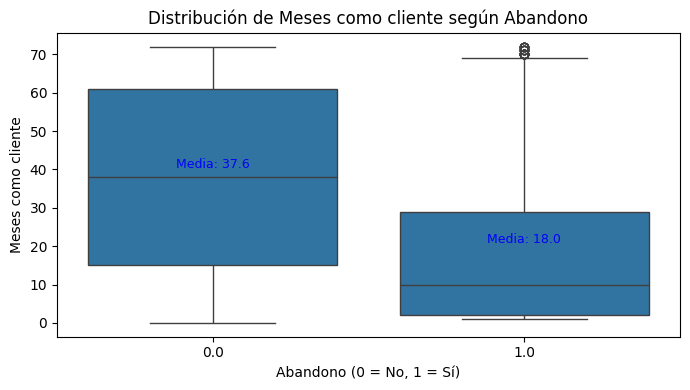

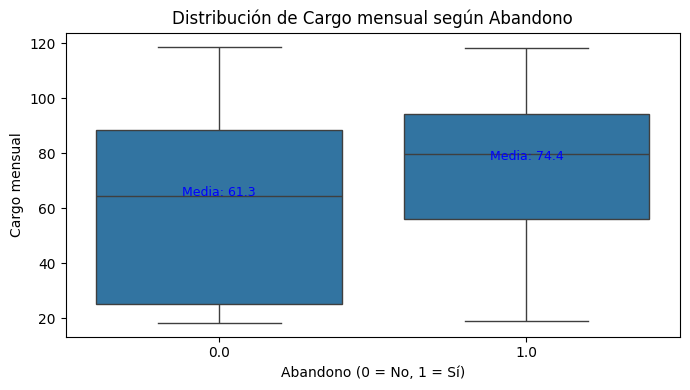

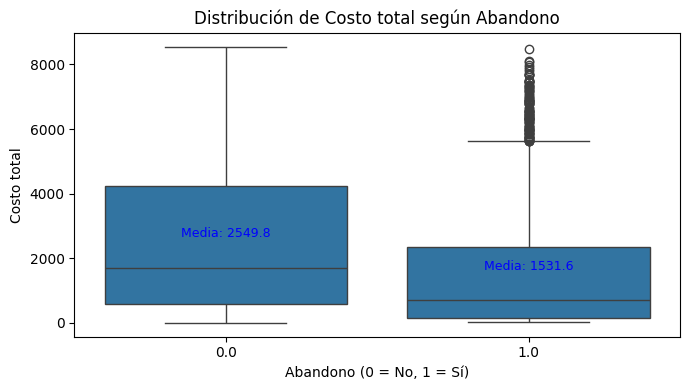

In [56]:
# 📊 1. Boxplot para comparar la distribución

import seaborn as sns
import matplotlib.pyplot as plt

num_vars = ['meses_como_cliente', 'cargo_mensual', 'costo_total']

for var in num_vars:
    plt.figure(figsize=(7, 4))
    ax = sns.boxplot(data=df_clean, x='abandono', y=var)
    plt.title(f'Distribución de {var.replace("_", " ").capitalize()} según Abandono')
    plt.xlabel('Abandono (0 = No, 1 = Sí)')
    plt.ylabel(var.replace("_", " ").capitalize())

    # ➕ Agregar etiquetas de media encima de cada boxplot
    medias = df_clean.groupby('abandono')[var].mean()

    for i, media in enumerate(medias):
        ax.text(i, media + 2, f'Media: {media:.1f}',
                color='blue', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


/tmp/ipython-input-57-1087398668.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 0], x=var, label='Permanece', shade=True)
/tmp/ipython-input-57-1087398668.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 1], x=var, label='Abandona', shade=True)


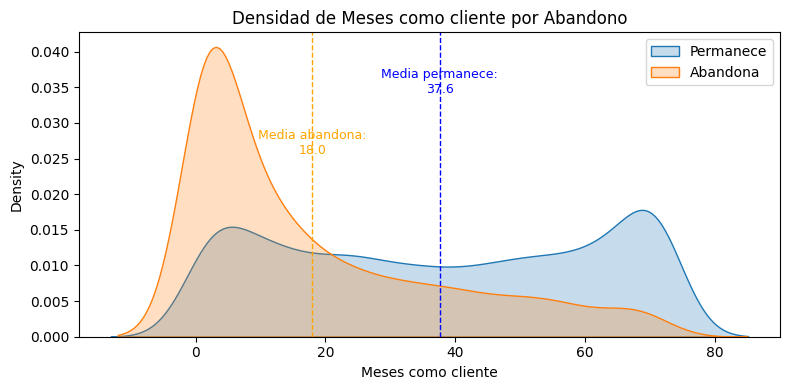

/tmp/ipython-input-57-1087398668.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 0], x=var, label='Permanece', shade=True)
/tmp/ipython-input-57-1087398668.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 1], x=var, label='Abandona', shade=True)


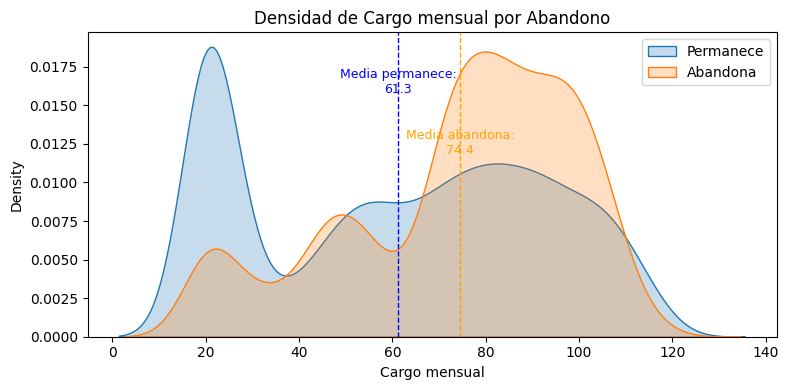

/tmp/ipython-input-57-1087398668.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 0], x=var, label='Permanece', shade=True)
/tmp/ipython-input-57-1087398668.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_clean[df_clean['abandono'] == 1], x=var, label='Abandona', shade=True)


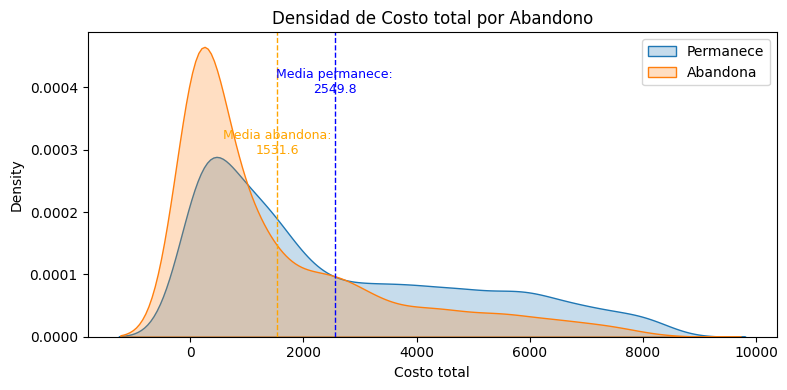

In [57]:
for var in num_vars:
    plt.figure(figsize=(8, 4))

    # Curvas de densidad
    sns.kdeplot(data=df_clean[df_clean['abandono'] == 0], x=var, label='Permanece', shade=True)
    sns.kdeplot(data=df_clean[df_clean['abandono'] == 1], x=var, label='Abandona', shade=True)

    # Medias
    media_permanece = df_clean[df_clean['abandono'] == 0][var].mean()
    media_abandona = df_clean[df_clean['abandono'] == 1][var].mean()

    plt.axvline(media_permanece, color='blue', linestyle='--', linewidth=1)
    plt.axvline(media_abandona, color='orange', linestyle='--', linewidth=1)

    # Etiquetas
    plt.text(media_permanece, plt.ylim()[1]*0.8, f'Media permanece:\n{media_permanece:.1f}',
             color='blue', ha='center', fontsize=9)
    plt.text(media_abandona, plt.ylim()[1]*0.6, f'Media abandona:\n{media_abandona:.1f}',
             color='orange', ha='center', fontsize=9)

    plt.title(f'Densidad de {var.replace("_", " ").capitalize()} por Abandono')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.legend()
    plt.tight_layout()
    plt.show()



#📄Informe final

# 📘 Informe Final - Análisis de Evasión de Clientes (Churn) - Telecom X

---

## 🔹 1. Introducción

Telecom X enfrenta una **alta tasa de cancelación de clientes**, lo cual impacta directamente en sus ingresos y sostenibilidad. Este análisis busca identificar **patrones, variables clave y segmentos de clientes en riesgo de evasión** a partir de los datos disponibles, como base para desarrollar estrategias de retención más efectivas.

---

## 🔹 2. Limpieza y Tratamiento de Datos

Se realizó un proceso completo de **Extracción, Transformación y Carga (ETL)**:

- 📥 **Extracción**: Datos obtenidos desde una fuente en formato JSON desde GitHub.
- 🧹 **Limpieza**:
  - Eliminación de duplicados.
  - Conversión de valores categóricos ("Yes"/"No") a binarios (1/0).
  - Estandarización de strings (minúsculas, sin guiones).
  - Cálculo del `costo_total` como `cargo_mensual * meses_como_cliente`.
- 🔄 **Transformación**:
  - Traducción de nombres de columnas a español para facilitar la comprensión.
  - Conversión de tipos de datos a `category`, `float` y `int` según el caso.

---

## 🔹 3. Análisis Exploratorio de Datos (EDA)

### 📊 Distribución general de evasión

- Clientes que **permanecen**: 5,174
- Clientes que **abandonan**: 1,869
- Proporción de evasión: **26.5%**

### 📦 Evasión por variables categóricas

#### 🔹 Tipo de contrato

| Tipo de Contrato | Permanece (0) | Abandona (1) |
|------------------|----------------|--------------|
| Month-to-month   | 2220           | 1655         |
| One year         | 1307           | 166          |
| Two year         | 1647           | 48           |

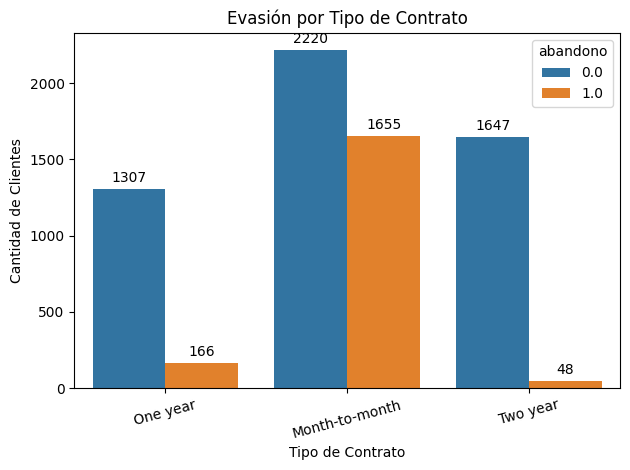

**Insight:** El mayor abandono ocurre entre clientes con contrato mes a mes.

#### 🔹 Género

| Género | Permanece (0) | Abandona (1) |
|--------|----------------|--------------|
| Female | 2549           | 939          |
| Male   | 2625           | 930          |

**Insight:** No hay diferencia significativa por género.

#### 🔹 Método de pago

| Método de Pago       | Permanece (0) | Abandona (1) |
|----------------------|----------------|--------------|
| Mailed check         | 1304           | 308          |
| Electronic check     | 1294           | 1071         |
| Credit card (auto)   | 1290           | 232          |
| Bank transfer (auto) | 1286           | 258          |

**Insight:** La evasión es notoriamente mayor con **cheques electrónicos**.

#### 🔹 Facturación electrónica

| Facturación Electrónica | Permanece (0) | Abandona (1) |
|--------------------------|----------------|--------------|
| No                       | 2403           | 469          |
| Sí                       | 2771           | 1400         |

**Insight:** La evasión es mayor entre quienes usan facturación electrónica.

#### 🔹 Servicio telefónico

| Servicio Telefónico | Permanece (0) | Abandona (1) |
|----------------------|----------------|--------------|
| No                   | 512            | 170          |
| Sí                   | 4662           | 1699         |

**Insight:** Quienes tienen servicio telefónico también presentan mayor evasión, posiblemente por volumen.

#### 🔹 TV Streaming

| TV Streaming | Permanece (0) | Abandona (1) |
|--------------|----------------|--------------|
| No           | 1868           | 942          |
| Sí           | 1893           | 814          |

#### 🔹 Soporte técnico

| Soporte Técnico | Permanece (0) | Abandona (1) |
|------------------|----------------|--------------|
| No               | 2027           | 1446         |
| Sí               | 1734           | 310          |

**Insight:** La evasión es mucho mayor entre quienes **no tienen soporte técnico**.

#### 🔹 Dependientes

| Tiene Dependientes | Permanece (0) | Abandona (1) |
|---------------------|----------------|--------------|
| No                  | 3390           | 1543         |
| Sí                  | 1784           | 326          |

**Insight:** Quienes **no tienen dependientes** tienden más al abandono.

---

### 📈 Variables numéricas según abandono

| Variable             | Promedio Permanece (0) | Promedio Abandona (1) |
|----------------------|------------------------|------------------------|
| Meses como cliente   | 37.6                   | 18.0                   |
| Cargo mensual        | 61.3                   | 74.4                   |
| Costo total          | 2549.8                 | 1531.6                 |

**Insight:** Los clientes que abandonan tienen menor antigüedad, menor gasto acumulado y mayor cargo mensual.

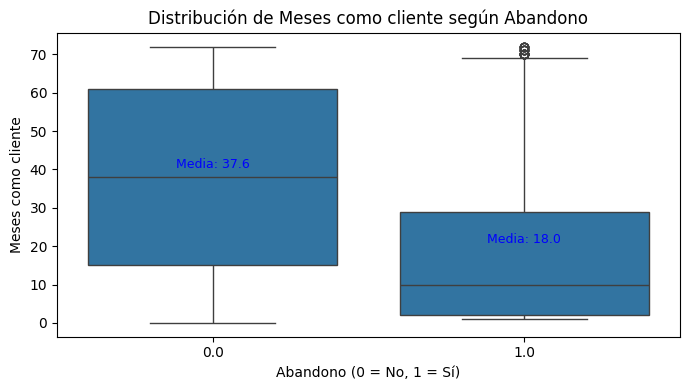

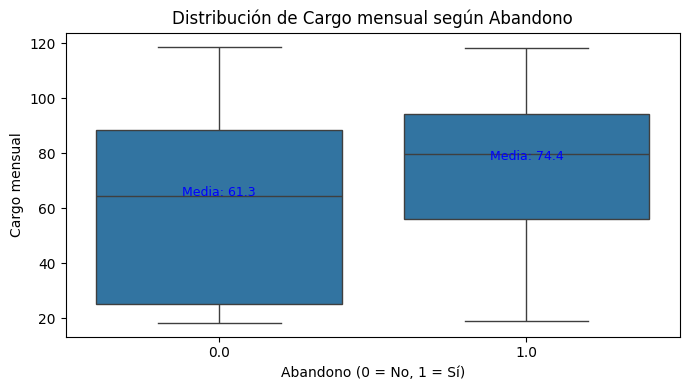
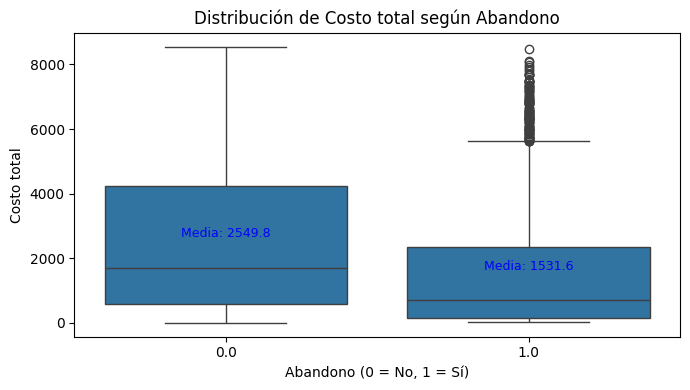
---

## 🔹 4. Conclusiones e Insights

- 🔹 El **26.5% de los clientes** abandonan el servicio.
- 🔹 La evasión es mayor entre:
  - Clientes con contrato mes a mes.
  - Usuarios que pagan con **cheque electrónico**.
  - Personas sin dependientes.
  - Clientes con menor antigüedad.
  - Quienes **no cuentan con soporte técnico**.
- 🔹 No se evidencian grandes diferencias de evasión entre géneros.

---

## 🔹 5. Recomendaciones

- 📌 **Fidelizar a los clientes nuevos** con promociones durante los primeros 6 meses.
- 📌 Incentivar la migración a **contratos anuales o bianuales**.
- 📌 Promover métodos de pago automáticos (transferencia o tarjeta).
- 📌 Ofrecer soporte técnico y servicios de valor agregado como seguridad o respaldo.
- 📌 Segmentar y priorizar intervenciones en usuarios con altos cargos mensuales y poca antigüedad.

## 📊 ¡Extra! Análisis de correlación entre variables

Se exploraron las correlaciones entre las variables numéricas y la variable objetivo `abandono`.

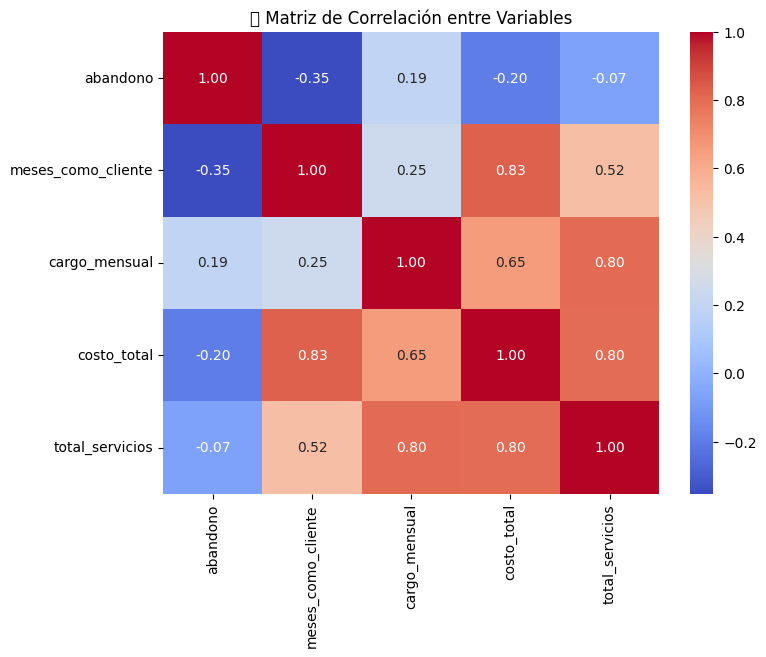

### 🔹 Hallazgos clave:

- Existe una correlación **negativa moderada** entre `meses_como_cliente` y `abandono` (**-0.35**), lo que indica que los clientes con menor antigüedad tienden a abandonar más.
- También hay una correlación **ligeramente negativa** con `costo_total` (**-0.20**) y `total_servicios` (**-0.07**).
- Por otro lado, `cargo_mensual` tiene una **correlación positiva** con `abandono` (**0.19**), lo que sugiere que quienes pagan más están más propensos a cancelar el servicio.

### ✅ Conclusión:

Estos hallazgos apoyan los resultados del análisis exploratorio previo y son útiles para el diseño de un modelo predictivo robusto. Variables como **meses como cliente**, **costo total** y **carga mensual** tienen relaciones significativas con la evasión, mientras que la cantidad de servicios contratados aporta valor aunque con menor fuerza.



Extra

In [59]:
# Variables binarias de servicios (ya convertidas a 1/0)
servicios_cols = [
    'servicio_telefonico', 'lineas_multiples', 'seguridad_en_linea',
    'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
    'tv_streaming', 'peliculas_streaming'
]

# Crear columna con la cantidad total de servicios contratados
df_clean['total_servicios'] = df_clean[servicios_cols].sum(axis=1)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


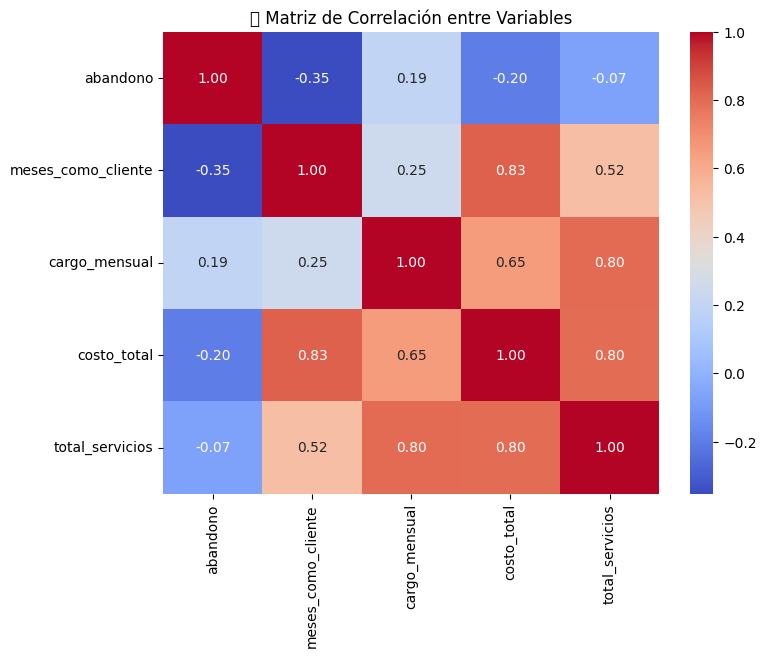

In [60]:
# Seleccionar solo columnas numéricas
correlaciones = df_clean[['abandono', 'meses_como_cliente', 'cargo_mensual',
                          'costo_total', 'total_servicios']].corr()

# Mostrar matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Matriz de Correlación entre Variables")
plt.show()
